## Vascular Data

This notebook lets you explore the Vascular Model Repository, normally hosted at http://www.vascularmodel.com

The data has been uploaded to the AHA precision medicine platform for you to access and explore.

### Data Description

The Vascular Model Repository consists of 3D CT and MR medical image volumes for over 100 different patients.
In addition to the original 3D image, 3D cardiovascular segmentations have also been made for each patient, these are available as 3D binary image volumes.

Anonymized meta data for each image is available in /seg_regression/data/DataList.csv

All image data is available in /seg_regression/data/images/

This notebook will walk you through plotting both the meta data and actual image data.

## Import dependencies

We will be using pandas to read and manipulate the data, along with matplotlib to plot.

In [22]:
import pandas as pd

import matplotlib.pyplot as plt

plt.figure()
plt.close()

In [23]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
plt.rcParams.update({'font.size': 22})

In [25]:
FIGSIZE = (8,8)

## Meta Data

We now read the meta data to print and visualize it.

The meta data contains the identifier for each image and information on the age and gender of the patient, along with the anatomical region that was imaged and any conditions, such as abnormalities or disease states, that were present.

In [26]:
data = pd.read_csv('./data/DataList.csv')

data.head()

,num,full_name,osmsc_id,image_id,sub_id,Modality,segtype,seg_subtype,gender,age
0,0,0001_0001,1.0,OSMSC0001,1,CT,cerebral,normal,F,30.0
1,1,0002_0001,2.0,OSMSC0002,1,CT,coronary,normal,F,63.0
2,2,0003_0001,3.0,OSMSC0003,1,CT,aortofemoral,normal,F,21.0
3,3,0004_0001,4.0,OSMSC0004,1,CT,aortofemoral,lower,F,23.0
4,4,0005_1001,5.0,OSMSC0005,1001,CT,pulmonary,normal,F,67.0


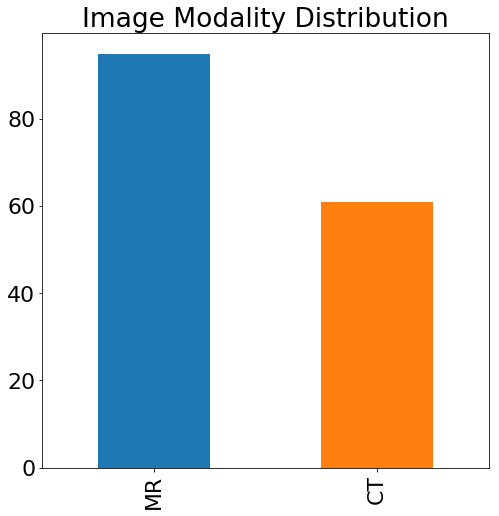

In [27]:
plt.figure(figsize=FIGSIZE)
plt.title('Image Modality Distribution')
data['Modality'].value_counts().plot(kind='bar')
plt.show()

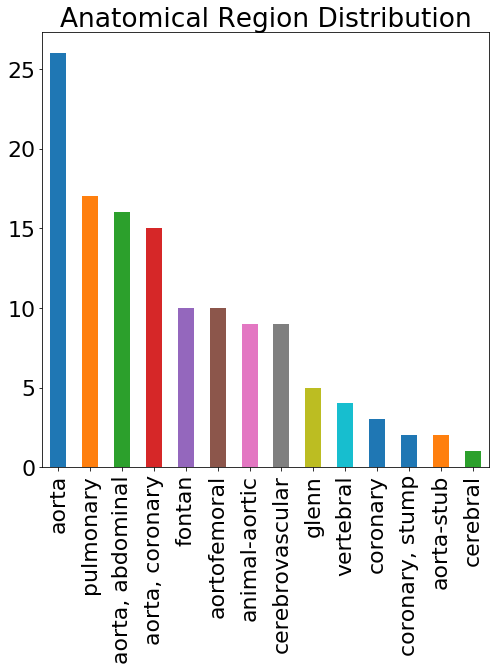

In [28]:
plt.figure(figsize=FIGSIZE)
plt.title("Anatomical Region Distribution")
data['segtype'].value_counts().plot(kind='bar')
plt.show()

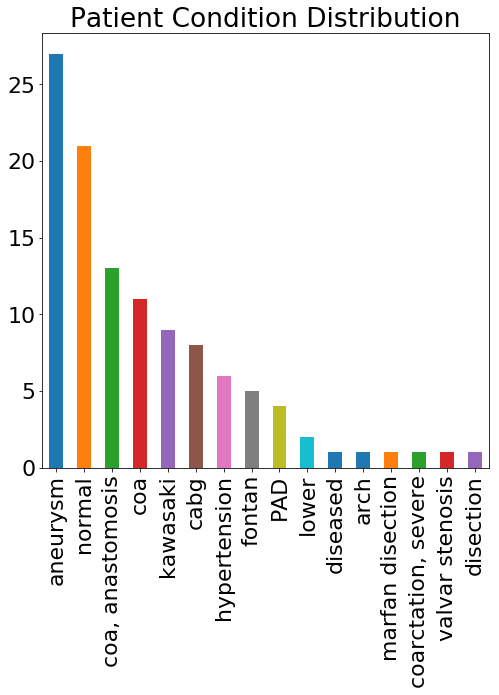

In [29]:
plt.figure(figsize=FIGSIZE)
plt.title("Patient Condition Distribution")
data['seg_subtype'].value_counts().plot(kind='bar')
plt.show()

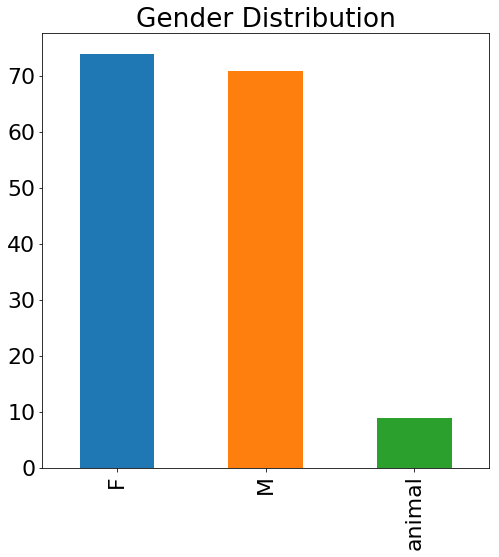

In [30]:
plt.figure(figsize=FIGSIZE)
plt.title("Gender Distribution")
data['gender'].value_counts().plot(kind='bar')
plt.show()

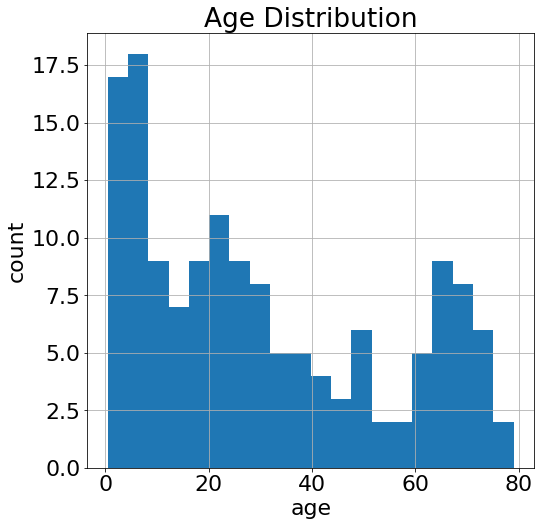

In [31]:
plt.figure(figsize=FIGSIZE)
plt.title("Age Distribution")
data['age'].hist(bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

## Image Visualization

We have seen that the vascular model repository contains images spanning a range of modalities, ages, genders, anatomical regions and conditions.

We will now visualize the 3D image volumes themselves to see what the data actually looks like. To visualize the images we have provided python libraries to interface with the vascular model repository data.

In [32]:
from modules import sv_image, vascular_data
import numpy as np
import os

## Loading an Image

The following cells allow an image from the vascular model repository to be specified by ID

In [33]:
print("available images:")
print(os.listdir('./data/images'))

available images:
['OSMSC0163', 'OSMSC0087', 'OSMSC0177', 'OSMSC0151', 'OSMSC0146', 'OSMSC0149', 'OSMSC0182', 'OSMSC0145', 'OSMSC0071', 'OSMSC0170', 'OSMSC0098', 'OSMSC0090', 'cabg5', 'OSMSC0113', 'OSMSC0103', 'OSMSC0187', 'OSMSC0097', 'OSMSC0172', 'OSMSC0136', 'OSMSC0079', 'OSMSC0109', 'OSMSC0147', 'OSMSC0139', 'OSMSC0093', 'OSMSC0104', 'OSMSC0183', 'OSMSC0158', 'OSMSC0130', 'OSMSC0099', 'OSMSC0110', 'OSMSC0159', 'OSMSC0141', 'OSMSC0108', 'OSMSC0074', 'OSMSC0185', 'OSMSC0116', 'OSMSC0160', 'OSMSC0085', 'OSMSC0156', 'OSMSC0186', 'OSMSC0178', 'OSMSC0078', 'OSMSC0069', 'OSMSC0006', 'OSMSC0176', 'OSMSC0162', 'OSMSC0167', 'OSMSC0148', 'OSMSC0072', 'OSMSC0143', 'OSMSC0140', 'OSMSC0101', 'OSMSC0003', 'OSMSC0181', 'OSMSC0117', 'OSMSC0073', 'OSMSC0068', 'OSMSC0005', 'OSMSC0175', 'OSMSC0002', 'normal1', 'OSMSC0180', 'OSMSC0173', 'OSMSC0083', 'OSMSC0134', 'OSMSC0166', 'OSMSC0169', 'OSMSC0096', 'OSMSC0080', 'OSMSC0121', 'OSMSC0106', 'OSMSC0174', 'OSMSC0142', 'OSMSC0092', 'OSMSC0138', 'OSMSC0184',

## Spacing and Window size
Once an image ID has been selected you can load it here by changing the IMAGE variable to the desired ID.

Additionally when viewing the image we need to specify physical spacing units (SPACING) to interpolate to, and a window size (RESLICE_EXTENT).

We have set the spacing to 0.05cm as this allows most vessels to be visualized well. Make the spacing smaller to increase the resolution, and make it larger 
to decrease the resolution.

The window size has been set to 160 pixels which provides a good view of the surrounding tissue. To see more make the window size bigger, and to restrict the view make it smaller.

In [43]:
IMAGE          = "OSMSC0110"
SPACING        = 0.05
RESLICE_EXTENT = 160
NUM_SLICES     = 10

image_path = './data/images/{}/image.mha'.format(IMAGE)
seg_path   = './data/images/{}/segmentation.mha'.format(IMAGE)
paths_path = './data/images/{}/paths.paths'.format(IMAGE)

In [44]:
image_sv = sv_image.Image(image_path)
image_sv.set_spacing(SPACING)
image_sv.set_reslice_ext(RESLICE_EXTENT)

seg_sv   = sv_image.Image(seg_path)
seg_sv.set_spacing(SPACING)
seg_sv.set_reslice_ext(RESLICE_EXTENT)

## 3D Medical Image Visualization

3D medical image volumes are represented as a 3d grid of pixels (or voxels).

We can visualize the image by viewing 2d planar "slices". We can define the plane using a normal and a tangent vector. Combined with the spacing and window size we can then interpolate pixel values in the plane to see what the image cross section looks like.

We have set up the normal vector to be perpendicular to the axial plane. The plotter will step through the image following the normal vector's direction and plot a number of slices. To change the direction, change the n vector and v vector. To change the distance traversed, change the STEP_SIZE variable.

In [45]:
#n = np.array([0,0,1])
#v = np.array([0,1,0])

#n = np.array([0,1,0])
#v = np.array([0,0,1])

n = np.array([1,0,0])
v = np.array([0,1,0])

STEP_SIZE = 10*SPACING

origin           = np.array(image_sv.image.GetOrigin())
extent           = np.array(image_sv.image.GetExtent())
original_spacing = np.array(image_sv.image.GetSpacing())
center           = origin+extent[1::2]*original_spacing/2


print(origin)
print(extent)
print(center)

[-20.3961  -5.11   -22.9461]
[  0 511   0  63   0 511]
[-0.4351625   1.19000009 -2.9851625 ]


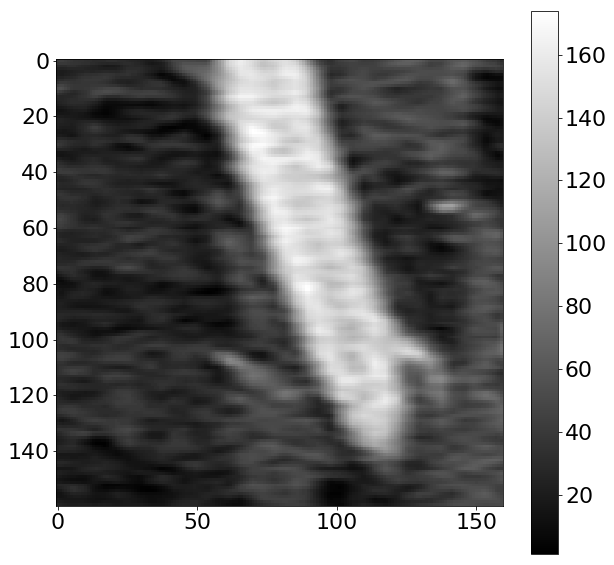

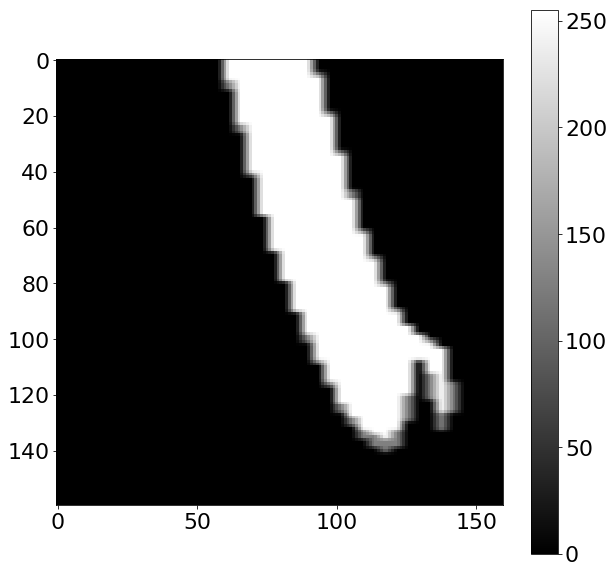

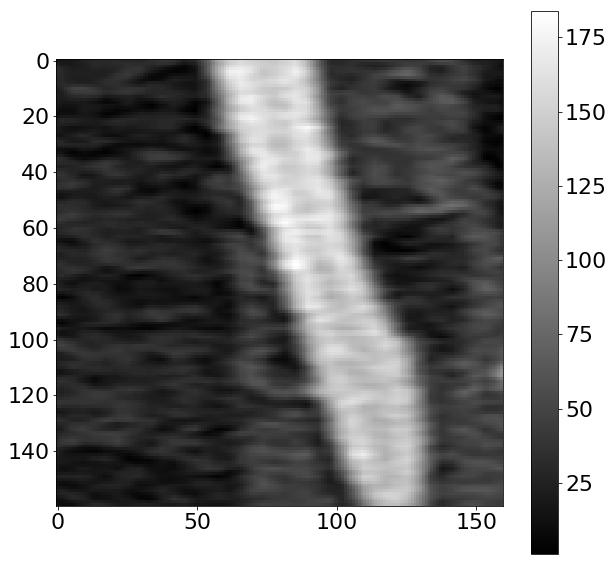

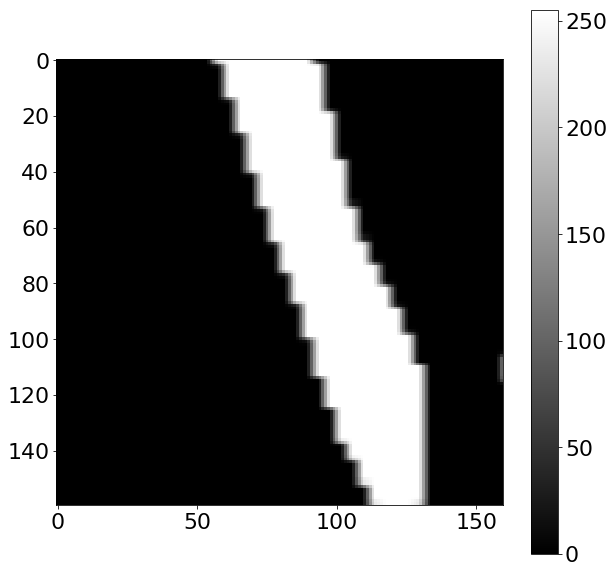

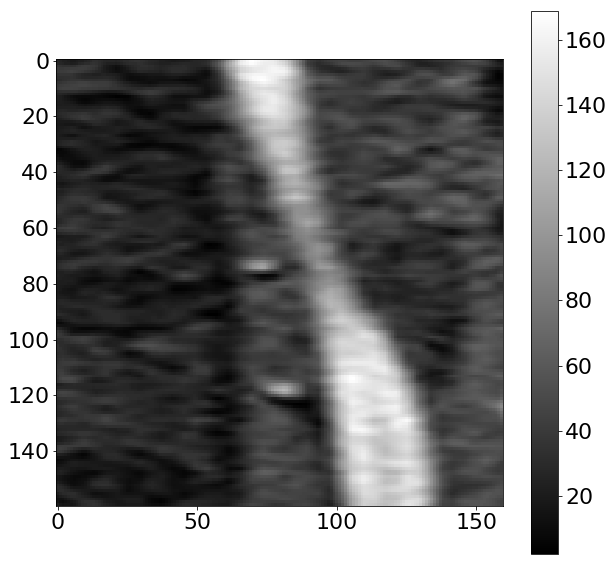

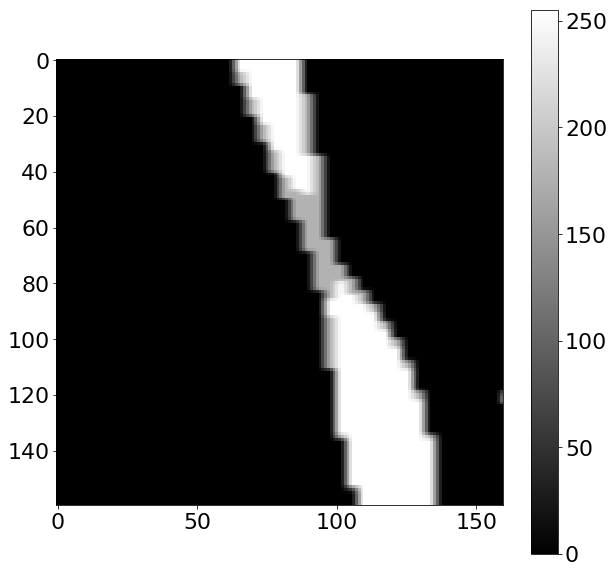

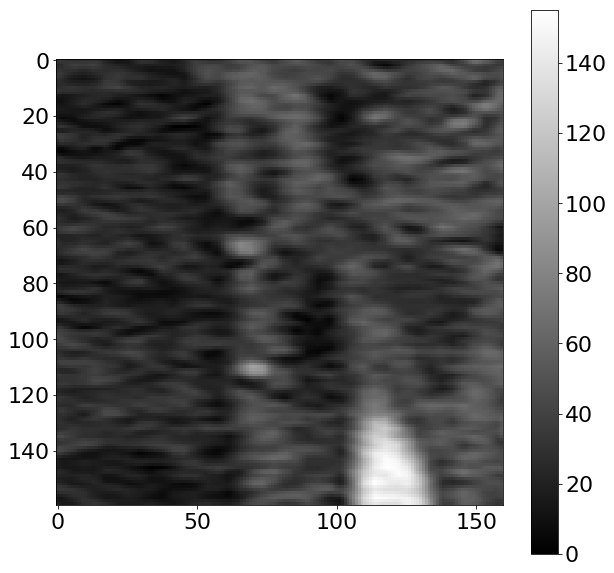

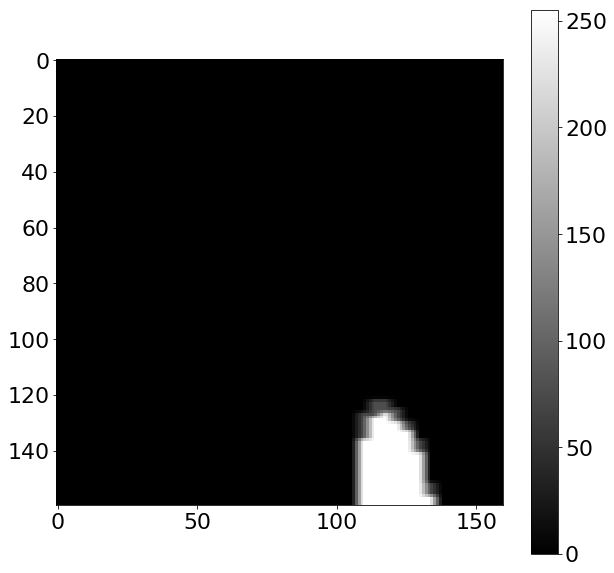

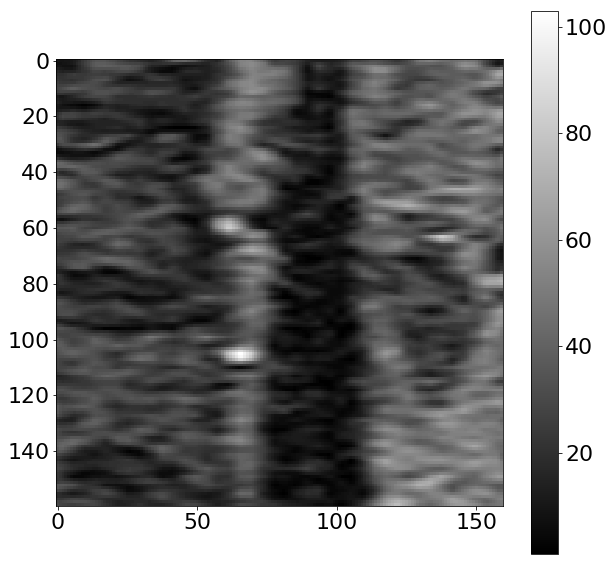

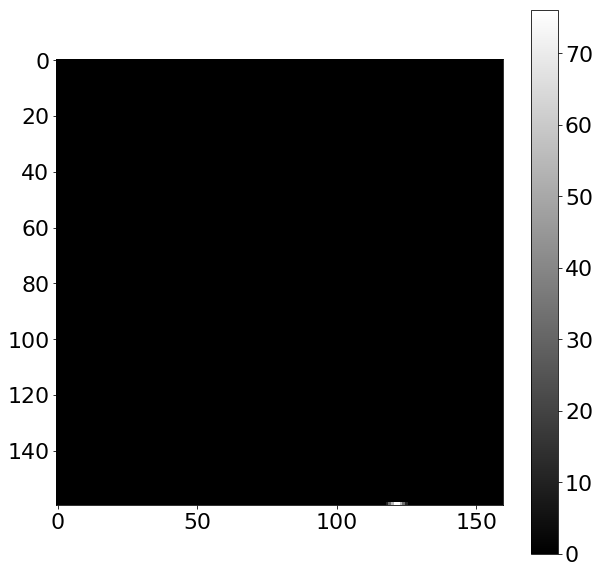

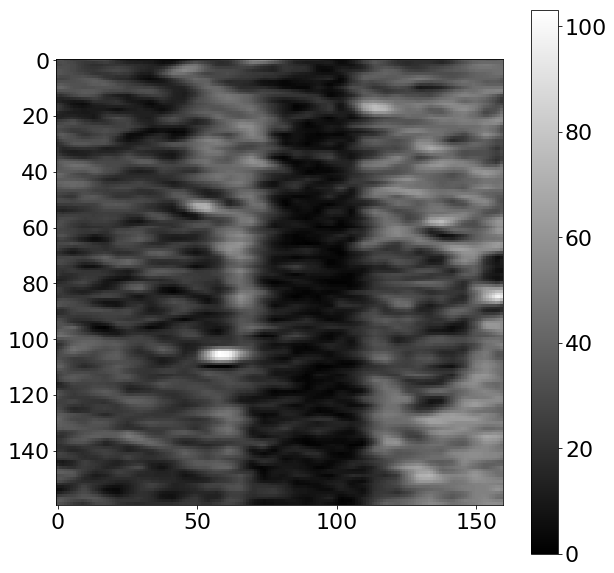

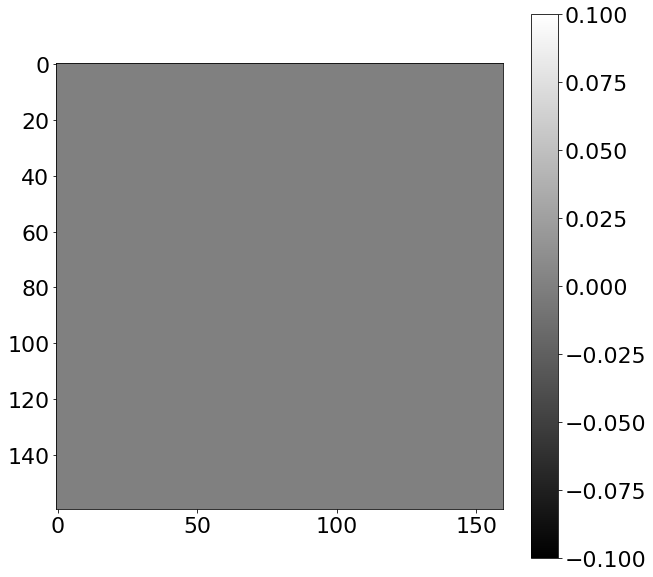

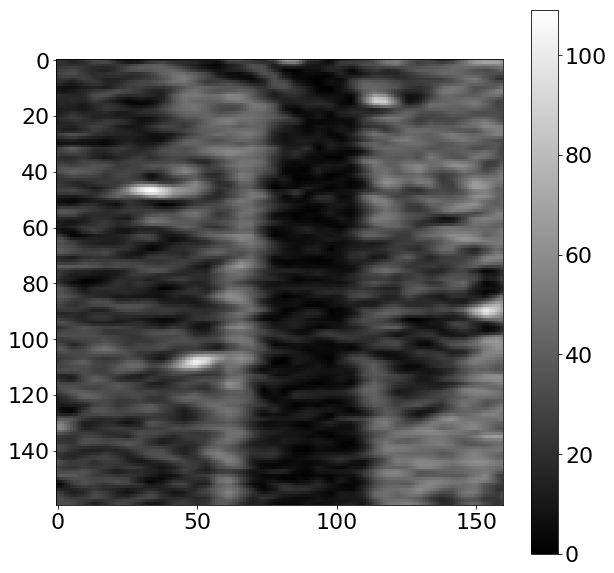

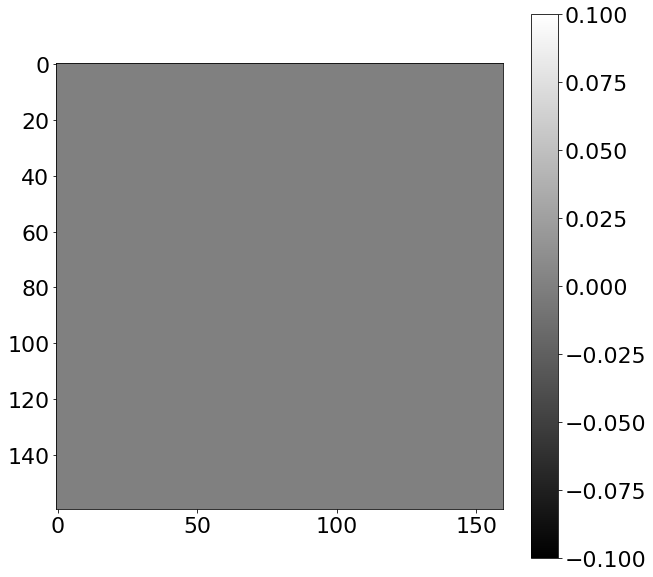

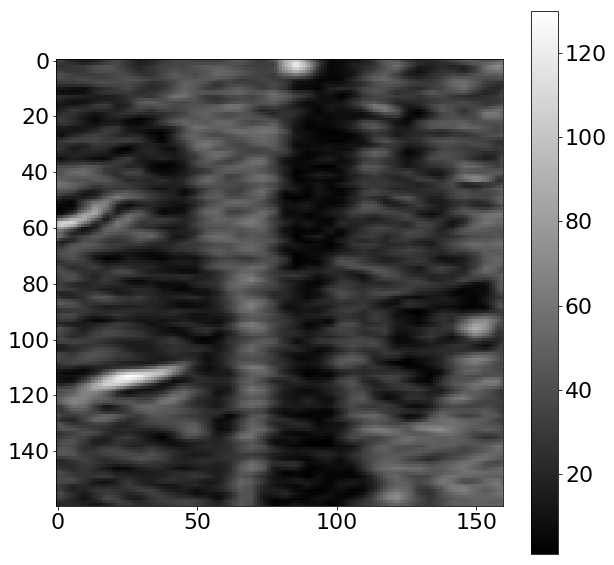

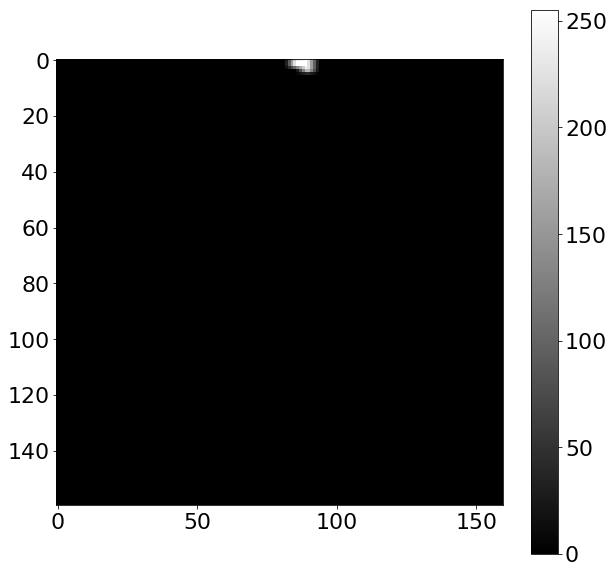

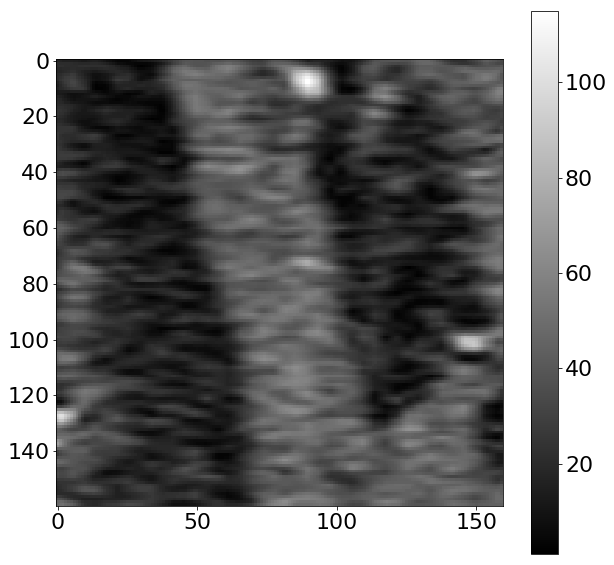

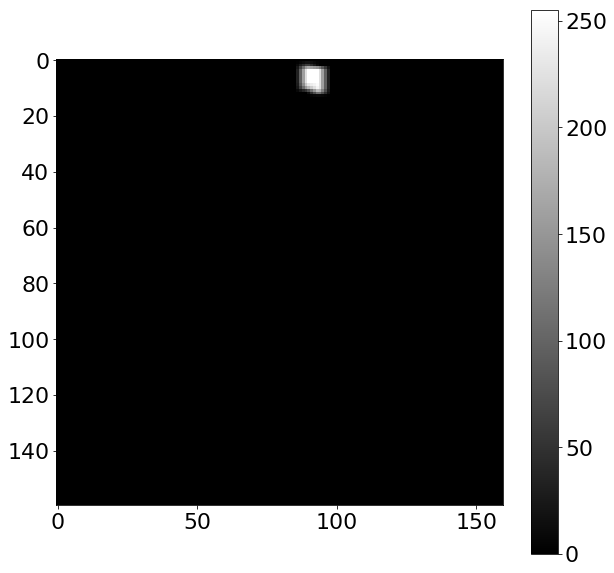

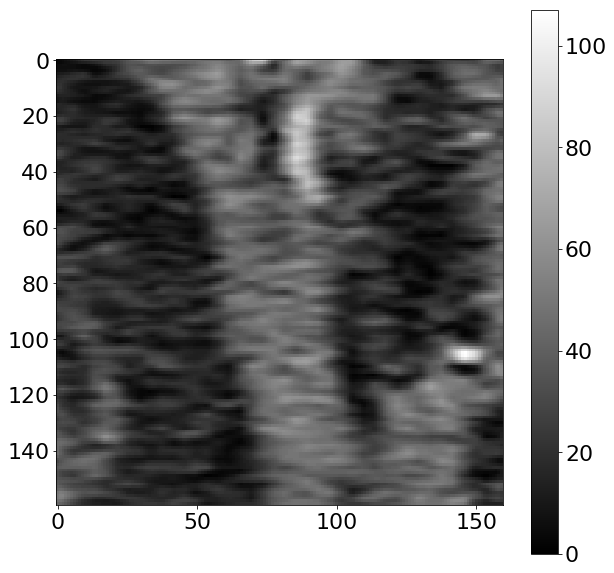

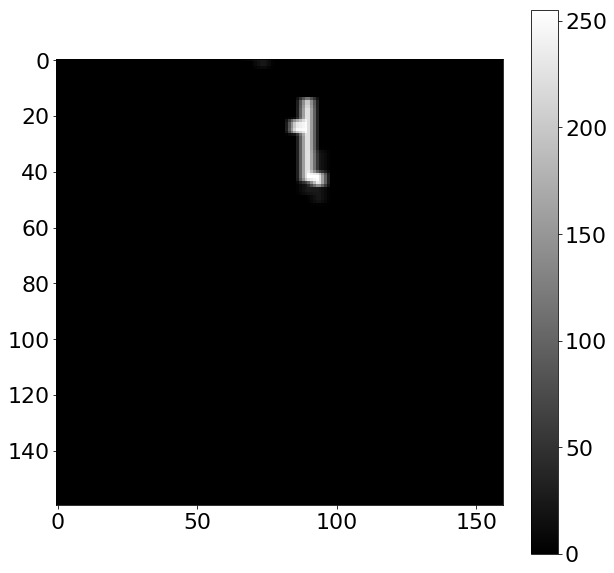

In [46]:
for i in range(NUM_SLICES):
    p = center + i*STEP_SIZE*n
    
    x = image_sv.get_reslice(p,n,v)
    y = seg_sv.get_reslice(p,n,v)

    plt.figure(figsize=(10,10))
    plt.imshow(x, cmap='gray')
    plt.colorbar()
    plt.show()

    plt.figure(figsize=(10,10))
    plt.imshow(y, cmap='gray')
    plt.colorbar()
    plt.show()

## Investigating Pixel Values

We are interested in identifying what part of the image contains blood vessels.

Typically the pixel values of blood vessels should be different from the surrounding tissue.

We can investigate this by loading a slice of the image data, having a human identify the blood vessel, and then plot a histogram of all pixel values alonside the pixel values of just the blood vessel.

This way we can get an idea of what other regions might contain blood vessel tissue.

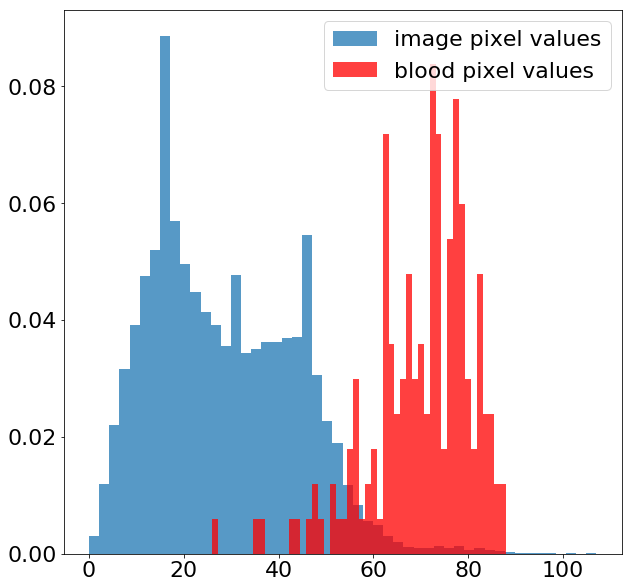

In [47]:
im_pix     = np.ravel(x)
im_weights = np.zeros_like(im_pix) + 1. / im_pix.size

blood_pix     = np.ravel(x[y>100])
blood_weights = np.zeros_like(blood_pix) + 1. / blood_pix.size

plt.figure(figsize=(10,10))
plt.hist(im_pix, weights=im_weights, bins=50, alpha=0.75, 
         label='image pixel values')
plt.hist(blood_pix, weights=blood_weights, color='red', bins=50, alpha=0.75, 
         label='blood pixel values')
plt.legend()
plt.show()

## Visualizing an Individual Vessel

A blood vessel can be thought of as a 3D path that traverses through the medical image volume.

By using the normal vector and tangent at each point of the path, we can define cross sections perpendicular to the vessel. This lets us visualize what the image looks like along the vessel.

The vascular model repository contains vessel path data for image. Each vessel has an id and a name.

We load the vessel path data here and use it to visualize the vessel. The list of vessel ids and names is plotted.

To select a particular vessel to plot, change the PATH_ID variable below. Note that the id has to be a string,

In [39]:
vessel_paths = vascular_data.parsePathFile(paths_path) 

In [40]:
print('vessel path ids and names')
for k in vessel_paths:
    print("path_id={}, name={}".format(k, vessel_paths[k]['name']))

vessel path ids and names
path_id=8, name=lc1_sub2
path_id=23, name=rsubcl
path_id=15, name=lc2_sub1_sub1
path_id=7, name=lc1
path_id=4, name=rc1
path_id=3, name=graft2
path_id=25, name=lc2_sub1_sub3
path_id=24, name=lc2_sub1_sub2
path_id=17, name=lc2_sub2_sub1
path_id=21, name=archfourth
path_id=10, name=lc1_sub3
path_id=14, name=rc1_sub3
path_id=11, name=lc1_sub3_sub1
path_id=5, name=rc1_sub1
path_id=20, name=rcc
path_id=19, name=leftsubcl
path_id=12, name=lc2
path_id=9, name=lc1_sub1
path_id=6, name=rc1_sub2
path_id=0, name=aorta
path_id=22, name=lcca
path_id=16, name=lc2_sub2
path_id=2, name=graft1
path_id=13, name=lc2_sub1
path_id=18, name=rc1_sub4


In [41]:
PATH_ID  = "7"
path     = vessel_paths[PATH_ID]
name     = path['name']
points   = path['points']
n_points = len(points)

print("path {} has {} points".format(name, n_points))

path lc1 has 200 points


lc1 path point 0


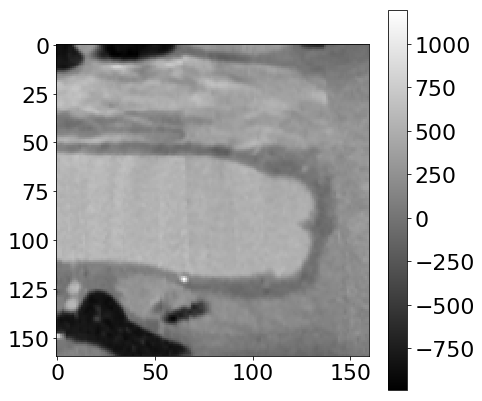

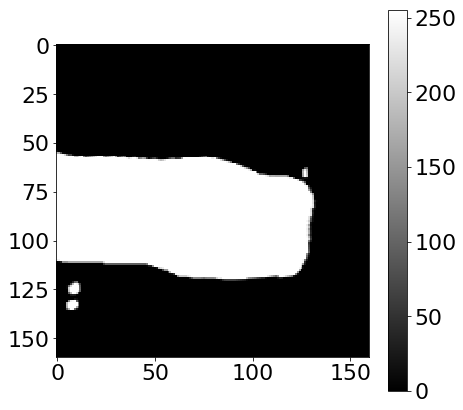

lc1 path point 10


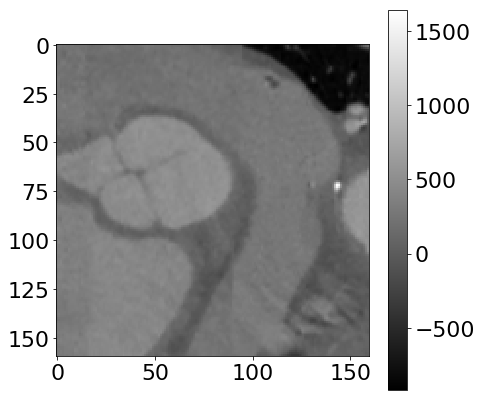

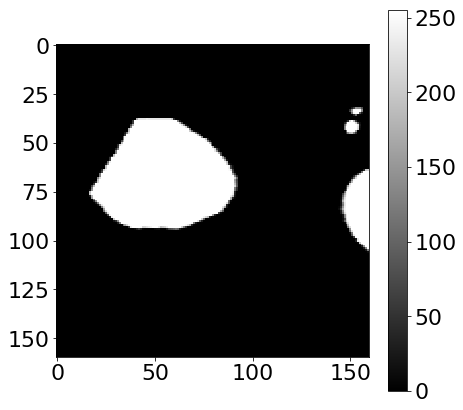

lc1 path point 20


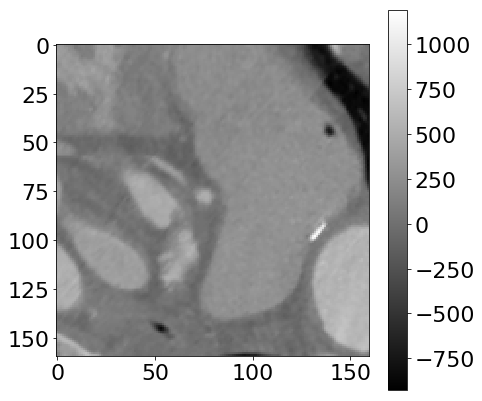

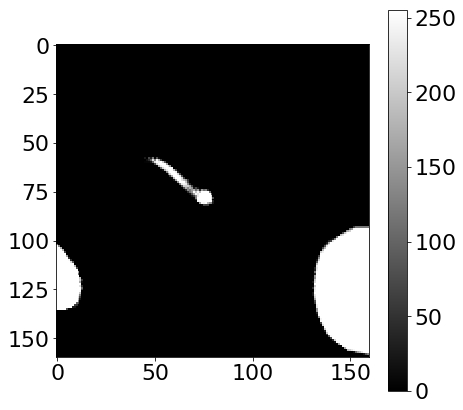

lc1 path point 30


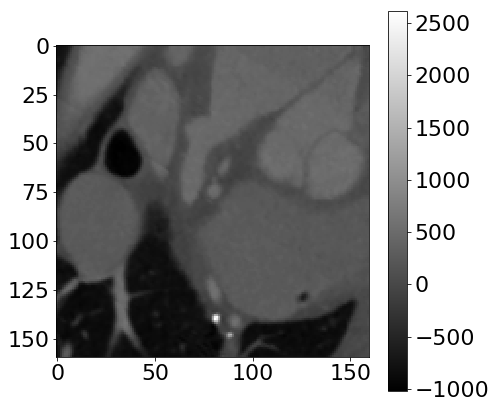

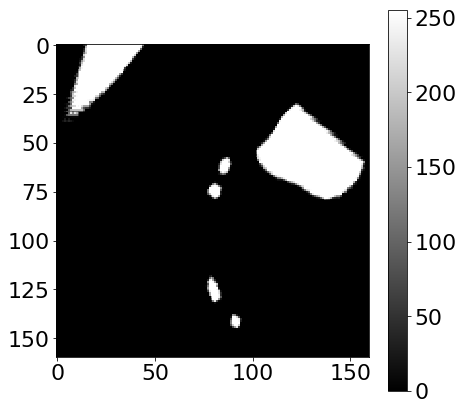

lc1 path point 40


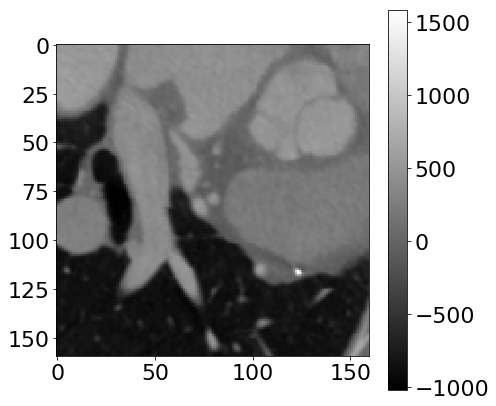

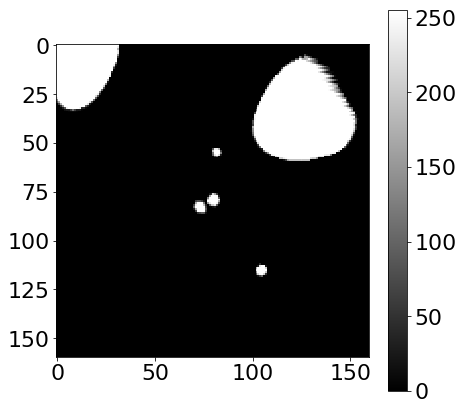

lc1 path point 50


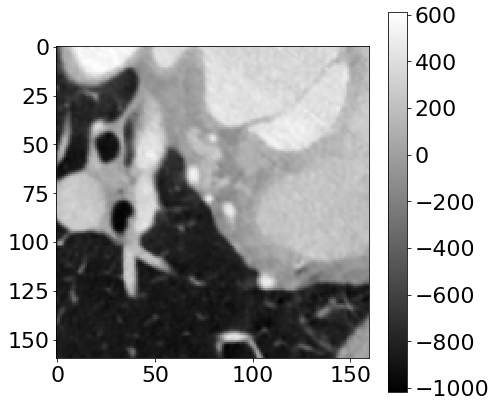

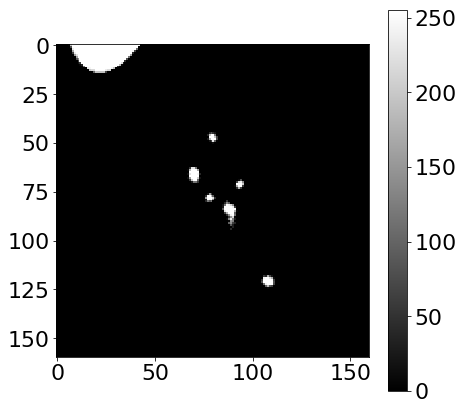

lc1 path point 60


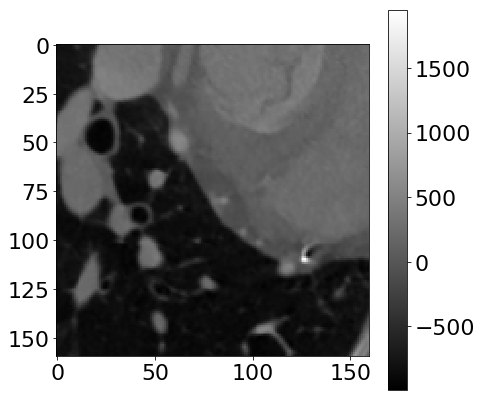

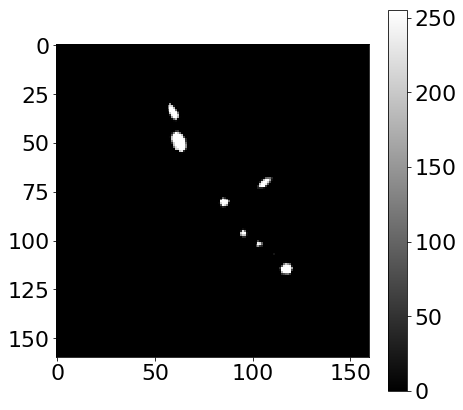

lc1 path point 70


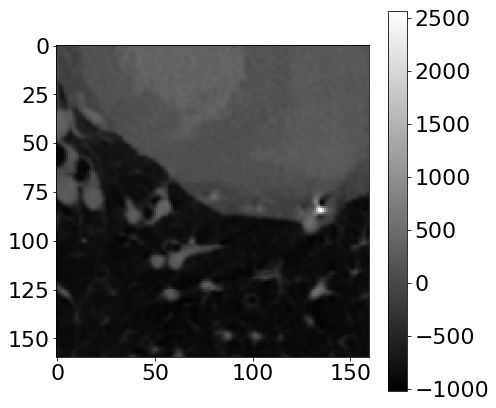

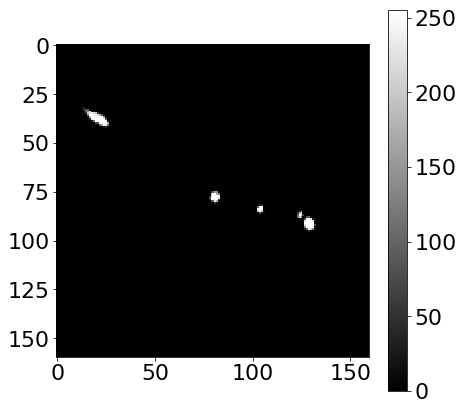

lc1 path point 80


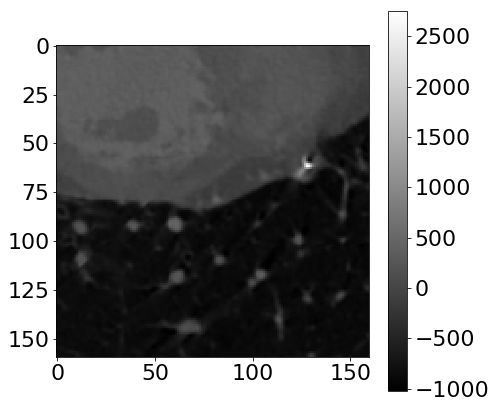

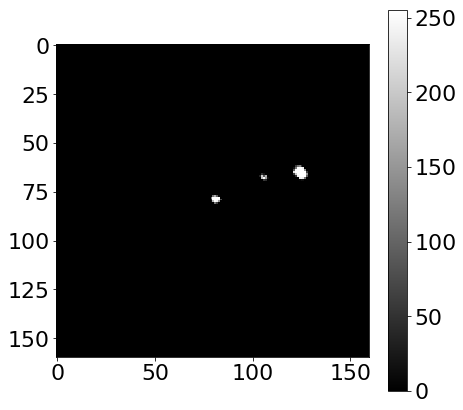

lc1 path point 90


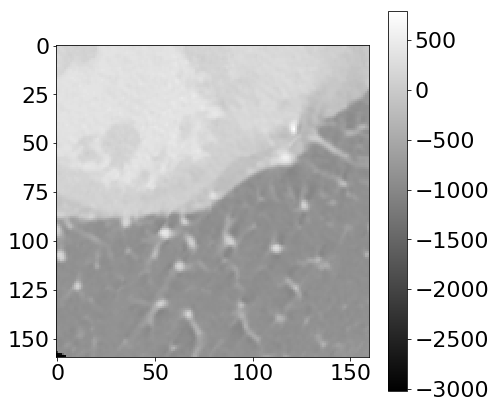

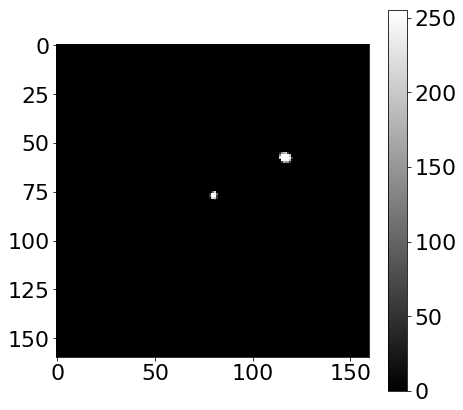

lc1 path point 100


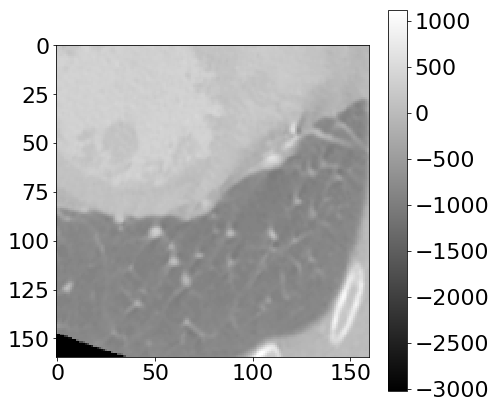

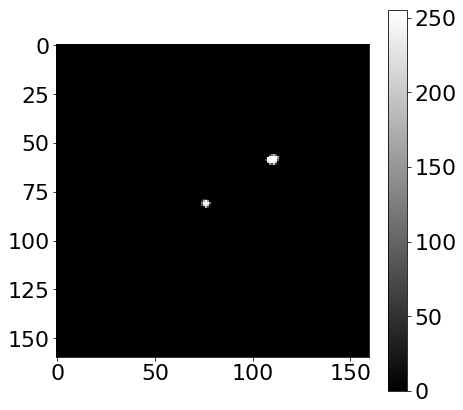

lc1 path point 110


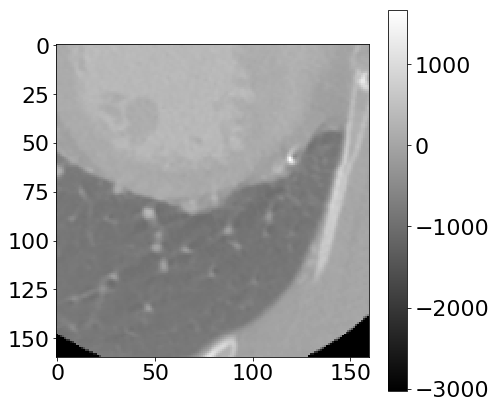

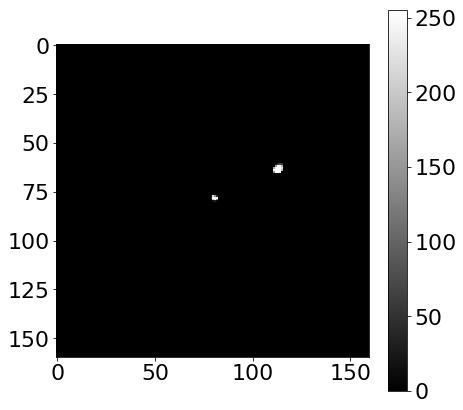

lc1 path point 120


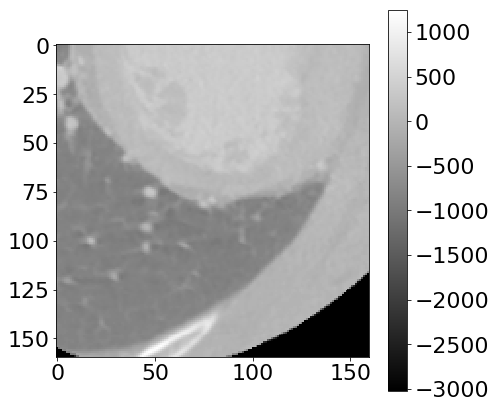

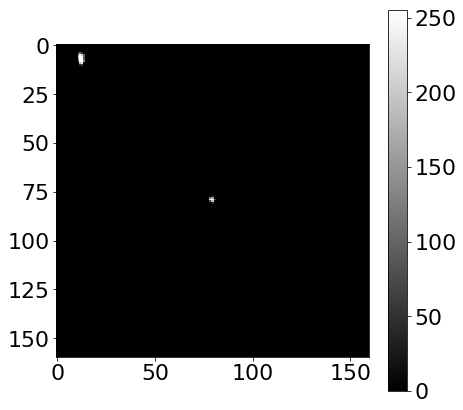

lc1 path point 130


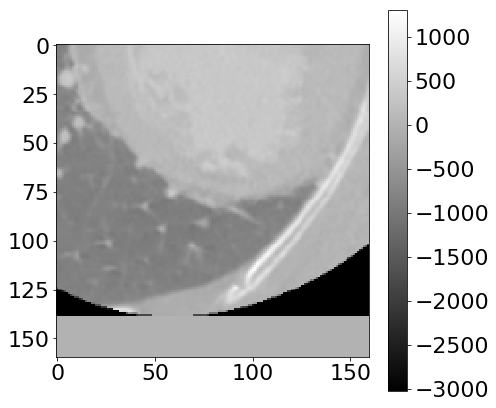

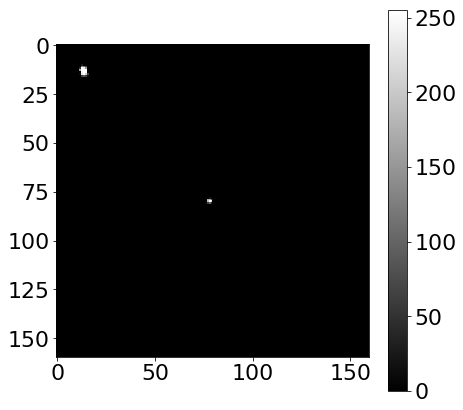

lc1 path point 140


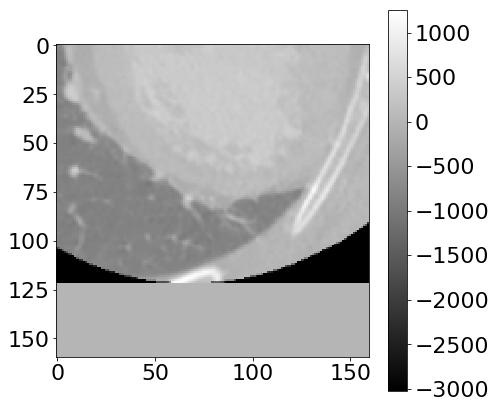

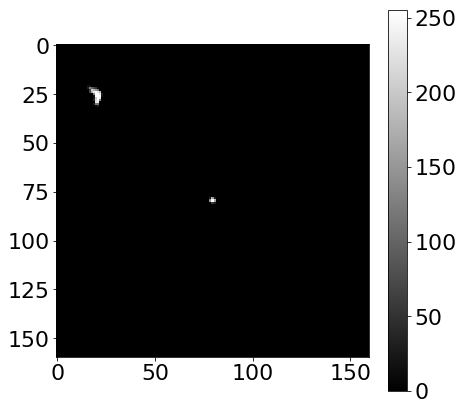

lc1 path point 150


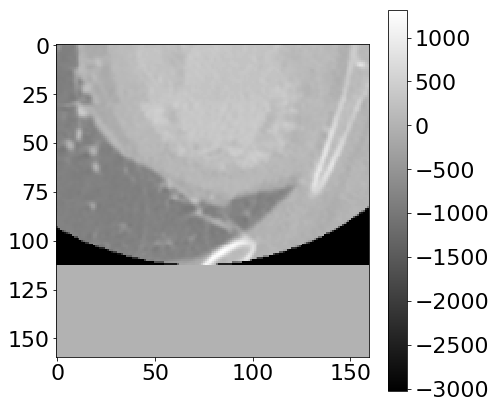

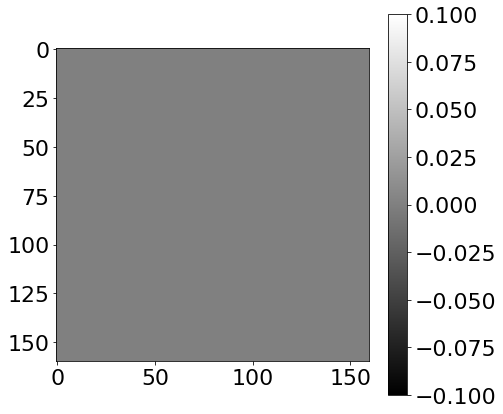

lc1 path point 160


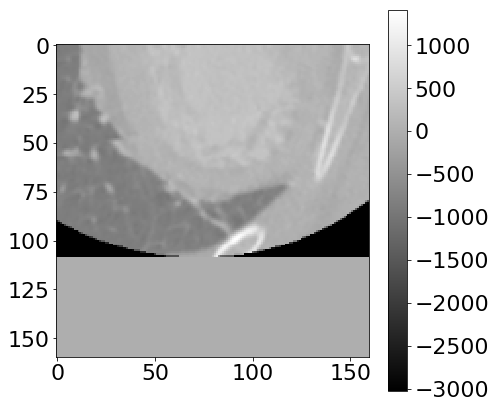

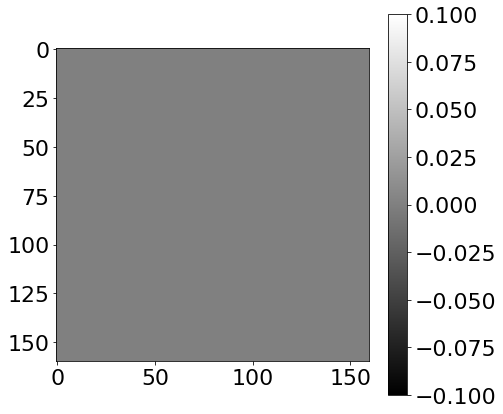

lc1 path point 170


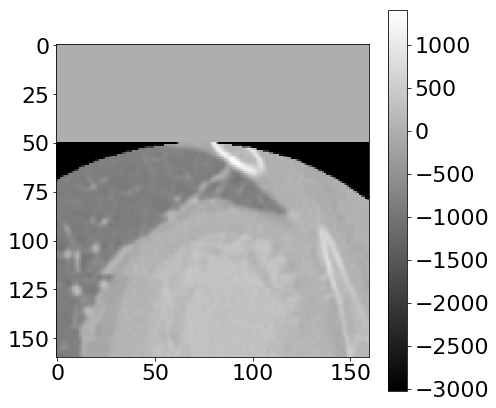

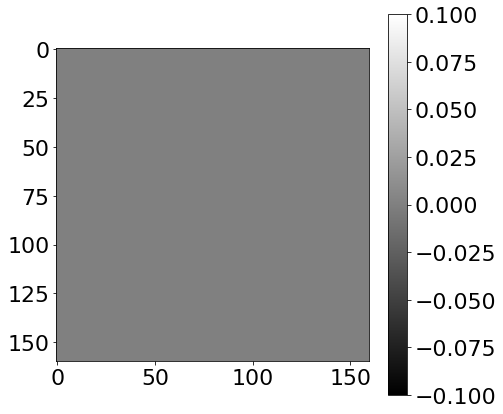

lc1 path point 180


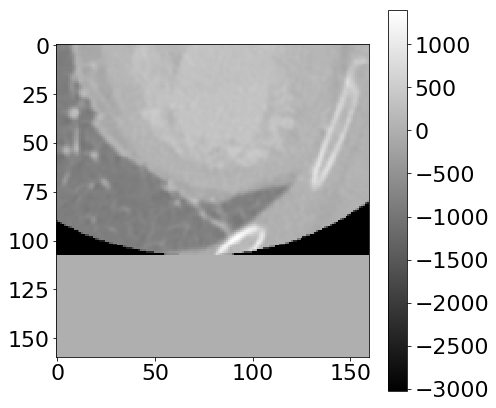

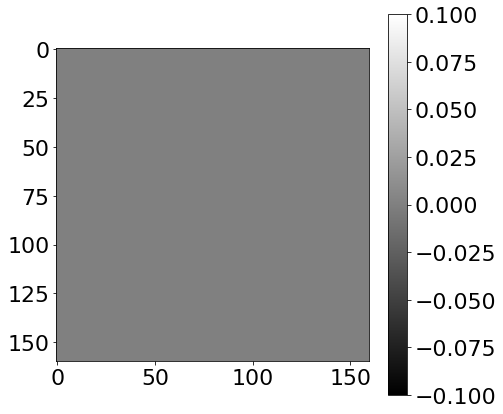

lc1 path point 190


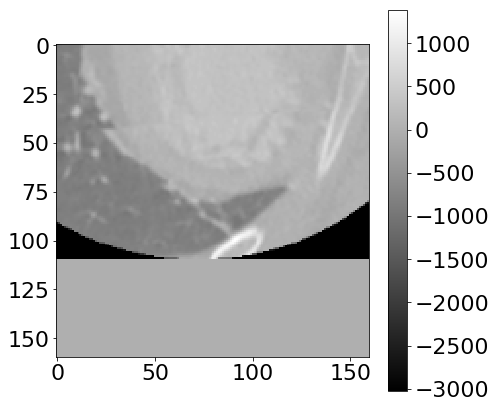

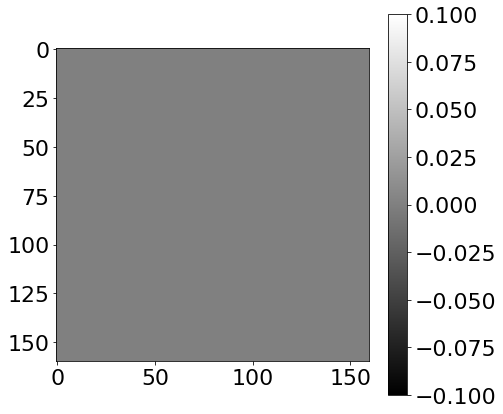

In [42]:
INTERVAL = 10
for i in range(0, n_points, INTERVAL):
    print("{} path point {}".format(name,i))
    point = points[i]
    
    p = point[:3]
    n = point[3:6]
    v = point[6:9]
    
    x = image_sv.get_reslice(p,n,v)
    y = seg_sv.get_reslice(p,n,v)

    plt.figure(figsize=(7,7))
    plt.imshow(x, cmap='gray')
    plt.colorbar()
    plt.show()

    plt.figure(figsize=(7,7))
    plt.imshow(y, cmap='gray')
    plt.colorbar()
    plt.show()